In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
fruits = pd.read_table('Data/fruit_data_with_colors.txt')

In [3]:
fruits.head()

fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55
1            1      apple  granny_smith   180    8.0     6.8         0.59
2            1      apple  granny_smith   176    7.4     7.2         0.60
3            2   mandarin      mandarin    86    6.2     4.7         0.80
4            2   mandarin      mandarin    84    6.0     4.6         0.79

In [4]:
fruits.shape

(59, 7)

In [5]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [6]:
X = fruits[['mass', 'width', 'height', 'color_score']]
Y = fruits['fruit_label']

X_train, X_test, Y_train, Y_text = train_test_split(X, Y, random_state=0)

In [7]:
X_train.shape

(44, 4)

In [8]:
X_test.shape

(15, 4)

In [9]:
Y_train.shape

(44,)

In [10]:
Y_text.shape

(15,)

## Visualizing the data

/Users/viveks/Repos/Learning/applied-data-science-with-python/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


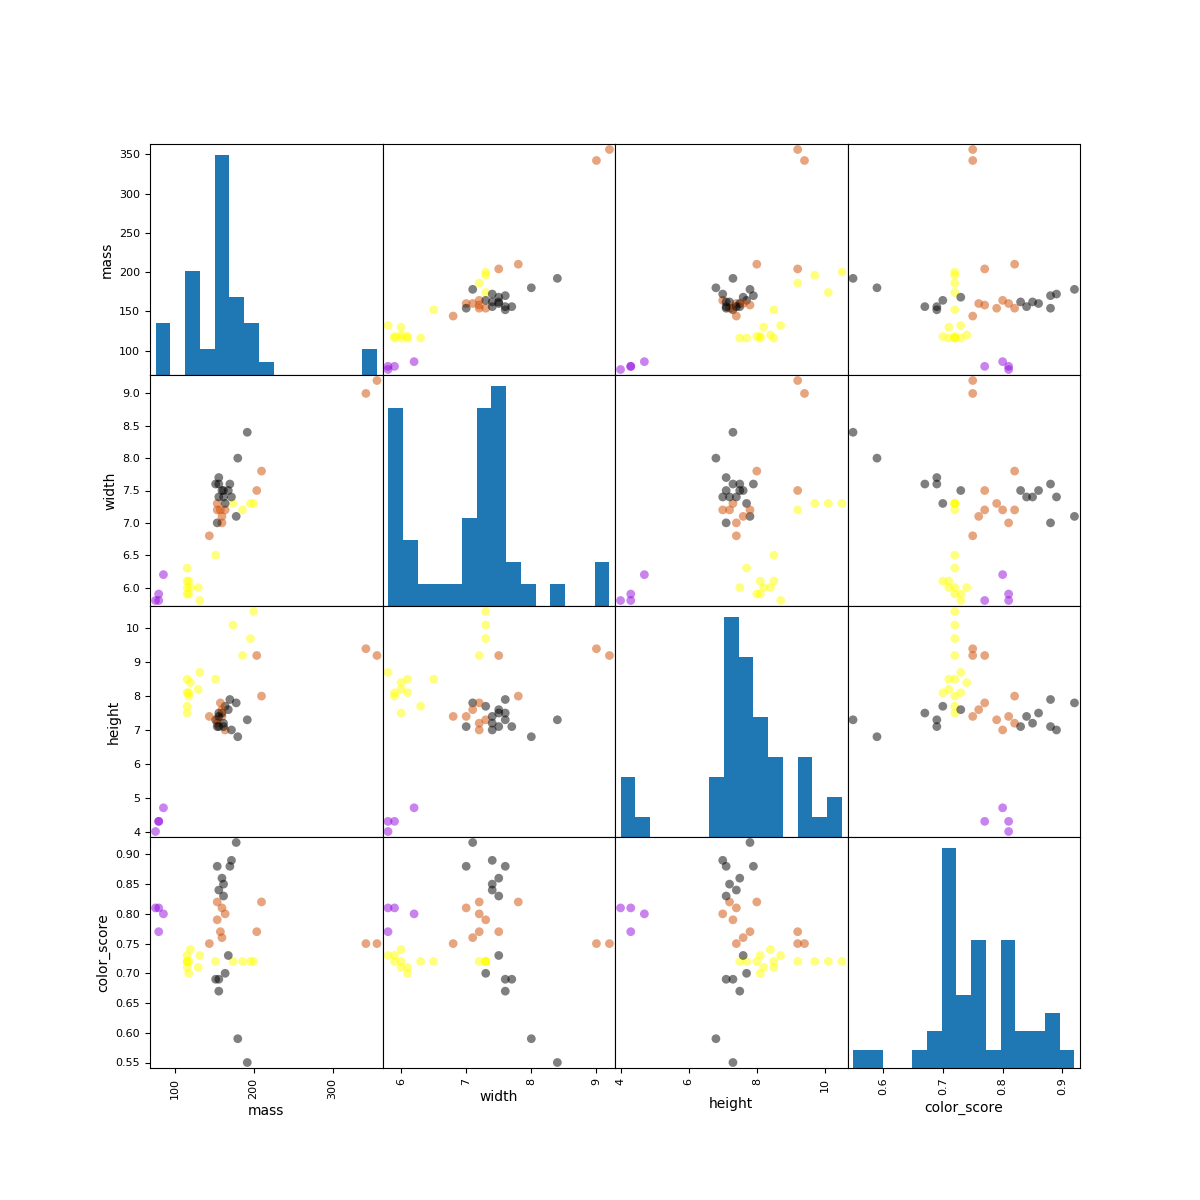

In [11]:
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X_train, c=Y_train, marker='o', s=40, hist_kwds={'bins': 15}, figsize=(12, 12), cmap=cmap)

<IPython.core.display.Javascript object>


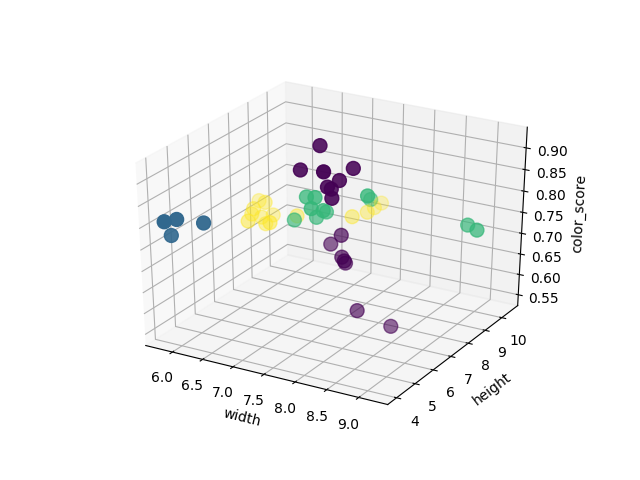

In [12]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = Y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### Create train test split.

In [13]:
X = fruits[['mass', 'width', 'height']]
Y = fruits['fruit_label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [14]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(44, 3) (15, 3) (44,) (15,)


## Training the classifier

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

In [17]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [19]:
## Estimate the accuracy of classifier
knn.score(X_test, Y_test)

0.53333333333333333

## Predicting the result

In [21]:
fruit_label = knn.predict([[20, 4.3, 5.5]])
lookup_fruit_name[fruit_label[0]]

'mandarin'

In [22]:
fruit_label = knn.predict([[100, 6.3, 8.5]])
lookup_fruit_name[fruit_label[0]]

'lemon'

### Plot the decision boundary of KNN classifier

<IPython.core.display.Javascript object>


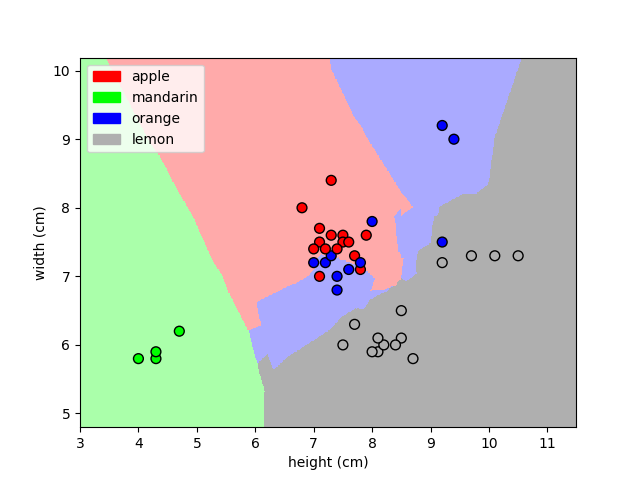

In [26]:
from adspy_shared_utilities import plot_fruit_knn
plot_fruit_knn(X_train, Y_train, 5, 'uniform')

## KNN classifier accuracy versus K

<IPython.core.display.Javascript object>


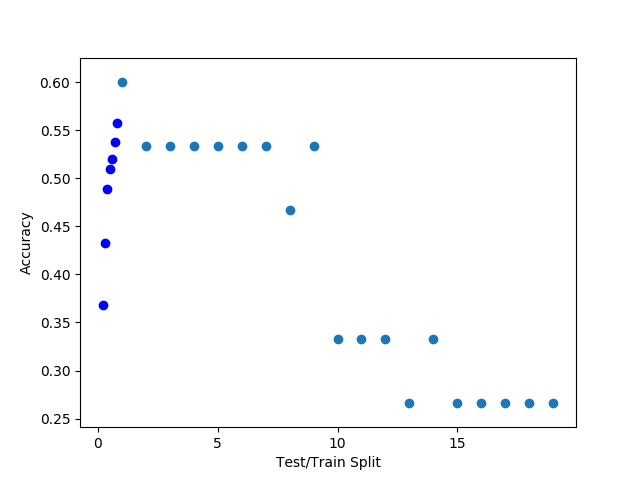

In [29]:
k_range = range(1, 20)
score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    score.append(knn.score(X_test, Y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, score)
plt.show()
plt.xticks([0, 5, 10, 15, 20]);

## KNN classification accuracy to train/test split 

<IPython.core.display.Javascript object>


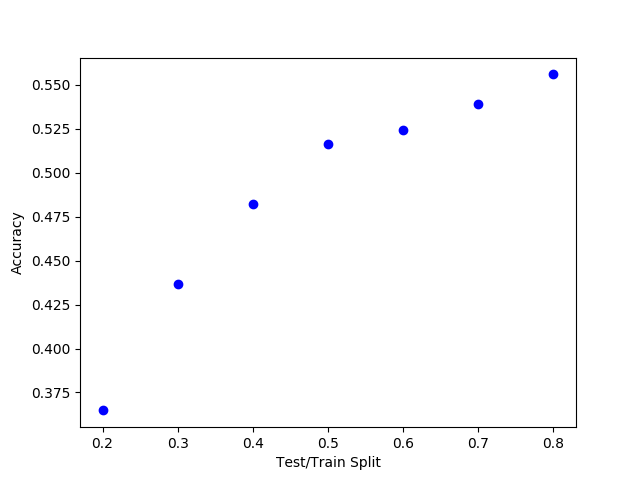

Text(0,0.5,'Accuracy')

In [32]:
t = [0.8, 0.7, 0.6, 0.4, 0.5, 0.3, 0.2]
knn = KNeighborsClassifier(n_neighbors=5)
plt.figure()

for s in t:
    score = []
    for i in range(1, 1000):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1-s)
        knn.fit(X_train, Y_train)
        score.append(knn.score(X_test, Y_test))
    plt.plot(s, np.mean(score), 'bo')

plt.xlabel('Test/Train Split')
plt.ylabel('Accuracy')